# Bank Marketing 


## Source of data:
* Paper: S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
* Data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


In [1034]:
import warnings
warnings.filterwarnings("ignore")#action='once') #warning appears only one
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [751]:
bktrain=pd.read_csv("C:/Users/CRL/Box Sync/PythonProjects/Marketing/bank-additional.csv",sep=";")
bktest=pd.read_csv("C:/Users/CRL/Box Sync/PythonProjects/Marketing/bank-additional-full.csv",sep=";")

In [752]:
bktest1=bktest.sample(frac=0.1,random_state=12)
bktest2=bktest.sample(frac=0.1,random_state=456)

In [753]:
bktest1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
28800,45,entrepreneur,married,university.degree,no,yes,no,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1,no
31345,36,admin.,single,basic.6y,no,yes,no,cellular,may,wed,...,2,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,no
20075,49,services,married,high.school,no,yes,yes,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
2929,33,admin.,married,high.school,no,yes,yes,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
4776,34,blue-collar,married,basic.9y,no,no,no,telephone,may,wed,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


## Cleaning and Feature Engineering

In [754]:
def new_dat(x):
    '''Function to create a new cleanned data frame for xning or for testing the models'''
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import LabelEncoder  
    Couple=[]
    for i in x.index:
        if list(x.marital)[i]=="married":
            Couple.append(1)
        elif list(x.marital)[i]=="single":
            Couple.append(0)
        elif list(x.marital)[i]=="divorced":
            Couple.append(0)
        elif list(x.marital)[i]=="unknown":
            Couple.append(np.nan)

    # Transform y from str to int  (yes=1)      
    lab = LabelEncoder()
    y=lab.fit_transform(x.y)

    # Transform loan from str to int  (yes=1)      
    lab = LabelEncoder()
    Loan=lab.fit_transform(x.loan)       # no=0;unknown=1;yes=2

    # Transform housing from str to int  (yes=1)      
    lab = LabelEncoder()
    Housing=lab.fit_transform(x.housing)       # no=0;unknown=1;yes=2

    # Transform default from str to int  (yes=1)      
    lab = LabelEncoder()
    Default=lab.fit_transform(x.default) # no=0;unknown=1;yes=2

    # last day contact
    days={'mon':1, 'tue':2,'wed':3,'thu':4,'fri':5}
    Day=[]
    for i in x.index:
        Day.append(days[x.day_of_week[i]])

    # last month contact
    months={'may':5, 'jun':6, 'nov':11, 'sep':9, 'jul':7, 'aug':8, 'mar':3, 'oct':10, 'apr':4,
           'dec':12}
    Month=[]
    for i in x.index:
        Month.append(months[x.month[i]])


    # Education
    from sklearn.preprocessing import LabelEncoder  
    Education=[]
    for i in x.index:
        if list(x.education)[i]=='university.degree':
            Education.append(5)
        elif list(x.education)[i]=='professional.course':
            Education.append(4)
        elif list(x.education)[i]=='high.school':
            Education.append(3)
        elif list(x.education)[i]=='illiterate':
            Education.append(0)
        elif list(x.education)[i]=='basic.9y':
            Education.append(2)
        elif list(x.education)[i]=='unknown':
            Education.append(np.nan)
        else:
            Education.append(1)

    Job=[]
    for i in x.index:
        if list(x.job)[i]=='unemployed':
            Job.append(0)
        elif (list(x.job)[i]=='retired') or (list(x.job)[i]=='student'):
            Job.append(1)
        elif (list(x.job)[i]=='blue-collar') or (list(x.job)[i]=='technician') or(list(x.job)[i]=='housemaid'):
            Job.append(2)
        elif (list(x.job)[i]=='admin.') or (list(x.job)[i]=='management') or (list(x.job)[i]=='entrepreneur') or (list(x.job)[i]=='self-employed') or (list(x.job)[i]=='services'):
            Job.append(4)
        elif list(x.job)[i]=='unknown':
            Job.append(np.nan)

    # Replace 999 by NaN in pdays
    Pdays=[] # number of days that passed by after the client was last contacted from a previous campaign
    for i in x.index:
        if list(x.pdays)[i]==999:
            Pdays.append(np.nan)
        else:
            Pdays.append(x.pdays[i])
    df=pd.DataFrame({"Age":x.age,"Couple":Couple,"Education":Education,"Job":Job,"Loan":Loan,"Housing":Housing,"Default":Default, "Campaign":x.campaign,"Day":Day,"Month":Month,
                     'EmployementRate':x['emp.var.rate'],'IPC':x['cons.price.idx'],'Confidence':x['cons.conf.idx'],'Euribor':x['euribor3m'],"Deposit":y})
    return df

In [757]:
train=new_dat(bktrain);train.head()

,Age,Couple,Education,Job,Loan,Housing,Default,Campaign,Day,Month,EmployementRate,IPC,Confidence,Euribor,Deposit
0,30,1.0,2.0,2.0,0,2,0,2,5,5,-1.8,92.893,-46.2,1.313,0
1,39,0.0,3.0,4.0,0,0,0,4,5,5,1.1,93.994,-36.4,4.855,0
2,25,1.0,3.0,4.0,0,2,0,1,3,6,1.4,94.465,-41.8,4.962,0
3,38,1.0,2.0,4.0,1,1,0,3,5,6,1.4,94.465,-41.8,4.959,0
4,47,1.0,5.0,4.0,0,2,0,1,1,11,-0.1,93.200,-42.0,4.191,0


In [758]:
def new_dattest(x):
    '''Function to create a new cleanned data frame for xning or for testing the models'''
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import LabelEncoder  
   
    Couple=[]
    for i in range(len(x.index)):
        if list(x.marital)[i]=="married":
            Couple.append(1)
        elif list(x.marital)[i]=="single":
            Couple.append(0)
        elif list(x.marital)[i]=="divorced":
            Couple.append(0)
        elif list(x.marital)[i]=="unknown":
            Couple.append(np.nan)
    
    # Transform y from str to int  (yes=1)      
    lab = LabelEncoder()
    y=lab.fit_transform(x.y)
    
    # Transform loan from str to int  (yes=1)      
    lab = LabelEncoder()
    Loan=lab.fit_transform(x.loan)       # no=0;unknown=1;yes=2

    # Transform housing from str to int  (yes=1)      
    lab = LabelEncoder()
    Housing=lab.fit_transform(x.housing)       # no=0;unknown=1;yes=2

    # Transform default from str to int  (yes=1)      
    lab = LabelEncoder()
    Default=lab.fit_transform(x.default) # no=0;unknown=1;yes=2

    # last day contact
    days={'mon':1, 'tue':2,'wed':3,'thu':4,'fri':5}
    Day=[]
    for i in x.index:
        Day.append(days[x.day_of_week[i]])

    # last month contact
    months={'may':5, 'jun':6, 'nov':11, 'sep':9, 'jul':7, 'aug':8, 'mar':3, 'oct':10, 'apr':4,
           'dec':12}
    Month=[]
    for i in x.index:
        Month.append(months[x.month[i]])


    # Education
    from sklearn.preprocessing import LabelEncoder  
    Education=[]
    for i in range(len(x.index)):
        if list(x.education)[i]=='university.degree':
            Education.append(5)
        elif list(x.education)[i]=='professional.course':
            Education.append(4)
        elif list(x.education)[i]=='high.school':
            Education.append(3)
        elif list(x.education)[i]=='illiterate':
            Education.append(0)
        elif list(x.education)[i]=='basic.9y':
            Education.append(2)
        elif list(x.education)[i]=='unknown':
            Education.append(np.nan)
        else:
            Education.append(1)

    Job=[]
    for i in range(len(x.index)):
        if list(x.job)[i]=='unemployed':
            Job.append(0)
        elif (list(x.job)[i]=='retired') or (list(x.job)[i]=='student'):
            Job.append(1)
        elif (list(x.job)[i]=='blue-collar') or (list(x.job)[i]=='technician') or(list(x.job)[i]=='housemaid'):
            Job.append(2)
        elif (list(x.job)[i]=='admin.') or (list(x.job)[i]=='management') or (list(x.job)[i]=='entrepreneur') or (list(x.job)[i]=='self-employed') or (list(x.job)[i]=='services'):
            Job.append(4)
        elif list(x.job)[i]=='unknown':
            Job.append(np.nan)

    # Replace 999 by NaN in pdays
    Pdays=[] # number of days that passed by after the client was last contacted from a previous campaign
    for i in range(len(x.index)):
        if list(x.pdays)[i]==999:
            Pdays.append(np.nan)
        else:
            Pdays.append(list(x.pdays)[i])
    df=pd.DataFrame({"Age":x.age,"Couple":Couple,"Education":Education,"Job":Job,"Loan":Loan,"Housing":Housing,"Default":Default, "Campaign":x.campaign,"Day":Day,"Month":Month,
                     'EmployementRate':x['emp.var.rate'],'IPC':x['cons.price.idx'],'Confidence':x['cons.conf.idx'],'Euribor':x['euribor3m'],"Deposit":y})
    return df

In [759]:
test1=new_dattest(bktest1)
test2=new_dattest(bktest2)

In [760]:
test1.head()

,Age,Couple,Education,Job,Loan,Housing,Default,Campaign,Day,Month,EmployementRate,IPC,Confidence,Euribor,Deposit
28800,45,1.0,5.0,4.0,0,2,0,2,4,4,-1.8,93.075,-47.1,1.410,0
31345,36,0.0,1.0,4.0,0,2,0,2,3,5,-1.8,92.893,-46.2,1.334,0
20075,49,1.0,3.0,4.0,2,2,0,1,1,8,1.4,93.444,-36.1,4.965,0
2929,33,1.0,3.0,4.0,2,2,0,2,3,5,1.1,93.994,-36.4,4.859,0
4776,34,1.0,2.0,2.0,0,0,0,2,3,5,1.1,93.994,-36.4,4.858,0


In [761]:
test2.head()

,Age,Couple,Education,Job,Loan,Housing,Default,Campaign,Day,Month,EmployementRate,IPC,Confidence,Euribor,Deposit
37560,25,0.0,3.0,1.0,0,0,0,1,5,8,-2.9,92.201,-31.4,0.869,0
8368,60,1.0,5.0,4.0,0,0,1,7,2,6,1.4,94.465,-41.8,4.864,0
35758,38,1.0,3.0,4.0,1,1,0,3,1,5,-1.8,92.893,-46.2,1.244,0
26379,40,0.0,5.0,4.0,0,0,0,1,4,11,-0.1,93.200,-42.0,4.076,1
32363,38,1.0,4.0,2.0,0,0,0,1,5,5,-1.8,92.893,-46.2,1.313,0


##### Verify the presence of sparse classes in features of training data

In [762]:
def sparse_classes(x,p):
    y=[]
    for j in x:
        y.append(x.count(j))
    m=np.median(y)
    z=[];v=[]
    for i in x:
        t=x.count(i)
        if (t<m) and (((m-t)/m)<p):
                z.append(i); v.append((m-t)/m)
        df=pd.DataFrame({"Classes":z,"Percent":v})
        if df.shape[0]==0:
            return ("There is not any sparse classe in the feature")
        else:
            return df

In [763]:
cols=['Education','Job','Day',"Month"]
for i in cols:
    print(sparse_classes(list(train[i]),p=0.05),i)


There is not any sparse classe in the feature Education
There is not any sparse classe in the feature Job
There is not any sparse classe in the feature Day
There is not any sparse classe in the feature Month


##### Correlation between the features and the lable
The features EmployementRate, IPC and Euribor are highly carrelated. Two of them will be removed: EmployementRate and Euribor.

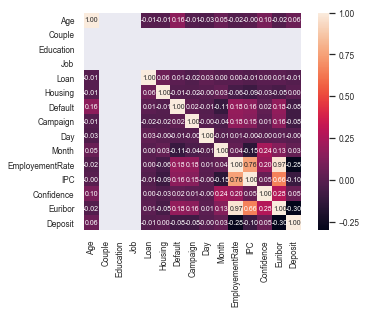

In [764]:
correl = np.corrcoef(train.values.T)
sns.set(font_scale=0.75)
hm = sns.heatmap(correl, cbar=True,annot=True,square=True,fmt='.2f',
                 annot_kws={'size': 7},yticklabels=train.columns,xticklabels=train.columns)
plt.show()

The correlations are calculated after removing EmployementRate and Euribor among the features. The heatmap bellow shows that there is not any feature highly correlated with another one.

In [765]:
train2=train.loc[:,['Age', 'Couple', 'Education', 'Job', 'Loan', 'Housing', 'Default',
       'Campaign', 'Day', 'Month', 'IPC', 'Confidence','Deposit']]

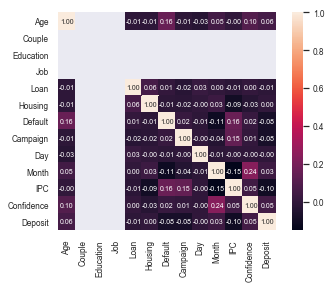

In [766]:
correl = np.corrcoef(train2.values.T)
sns.set(font_scale=0.75)
hm = sns.heatmap(correl, cbar=True,annot=True,square=True,fmt='.2f',
                 annot_kws={'size': 7},yticklabels=train2.columns,xticklabels=train2.columns)
plt.show()

##### Features scaling

In [767]:
train3=train2.dropna()
X=train3.loc[:,['Age', 'Couple', 'Education', 'Job', 'Loan', 'Housing', 'Default',
       'Campaign', 'Day', 'Month', 'IPC', 'Confidence']]

y=train3["Deposit"]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

######## Test 1 ###############
test1=test1.dropna()
X_test1=test1.loc[:,['Age', 'Couple', 'Education', 'Job', 'Loan', 'Housing', 'Default',
       'Campaign', 'Day', 'Month', 'IPC', 'Confidence']]
y_test1=test1.Deposit

######## Test 2 ###############
test2=test2.dropna()
X_test2=test2.loc[:,['Age', 'Couple', 'Education', 'Job', 'Loan', 'Housing', 'Default',
       'Campaign', 'Day', 'Month', 'IPC', 'Confidence']]
y_test2=test2.Deposit

In [768]:
def MyScaler(x):
    num=["Age","IPC","Confidence"]
    x_num=x[num]
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler().fit(x_num)  #compute minimum and maximum on the training data
    scaled = scaler.transform(x_num) # rescale X
        
    categoric=x[['Couple', 'Education', 'Job', 'Loan', 'Housing', 'Default',
       'Campaign', 'Day', 'Month']]
    df_num=pd.DataFrame(scaled);df_num.columns=num
    categoric.reset_index(inplace=True)
    df=pd.merge(df_num,categoric,left_index=True, right_index=True)
    return df

In [774]:
X_train0=MyScaler(X_train); X_test0=MyScaler(X_test)
X_test1=MyScaler(X_test1); X_test2=MyScaler(X_test2)

## Trainning the model

To evaluate the model, the metric "precision" is chosen. Indeed, for the next marketing campaign, the banks managers decided to contact only customers with high probability to buy a term deposit certificate. Thus, to reduce the marketing expenses, the bank should contact a higher proportion of customers that will accept to buy the certificate. This proportion is the precision of the prediction of customers that will accept to buy the certificate. We will compute this metric to compare several models and several parameters, to choose the best model that increases the precision of the prediction. 

In [934]:
Scoring='recall_micro'
# 1) Logistic regression
logreg = LogisticRegression()
log_scores = cross_val_score(logreg, X_train0,y_train,cv=4,scoring=Scoring)

# 2) Linear support vector 
svm=LinearSVC(random_state=0,max_iter=100000) # should have random_state not to change estimates
svm_scores = cross_val_score(svm,  X_train0, y_train,cv=4,scoring=Scoring)

# 3) kernalized support vector
svc=SVC(kernel="linear",C=1,gamma=5,max_iter=100000)
svc_scores=cross_val_score(svc,  X_train0, y_train,cv=4,scoring=Scoring)

# 4) kernalized support vector with RBF
svc=SVC(kernel="rbf",C=1,gamma=5,max_iter=100000)
svc_rbf_scores=cross_val_score(svc,  X_train0, y_train,cv=4,scoring=Scoring)

# knn
knn = KNeighborsClassifier(n_neighbors=3)
knn_scores = cross_val_score(knn,  X_train0, y_train,cv=4,scoring=Scoring)

# Neural network (multilayer perceptron)
mpl=MLPClassifier(random_state=0,hidden_layer_sizes=[21])
mpl_scores=cross_val_score(mpl, X_train0, y_train,cv=4,scoring=Scoring)

# Decision tree
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_scores=cross_val_score(tree, X_train0, y_train,cv=4,scoring=Scoring)


["Logistic: {}".format(round(log_scores.mean(),3)),"SVM: {}".format(round(svm_scores.mean(),3))
                  ,"SVC, with linear kernel :{}".format(round(svc_scores.mean(),3)),"SVC with RBF:{}".format(round(svc_rbf_scores.mean(),3)),
         "MPL: {}".format(round(mpl_scores.mean(),3)),"KNN: {}".format(round(knn_scores.mean(),3)),"Tree: {}".format(round(tree_scores.mean(),3))]


['Logistic: 0.89',
 'SVM: 0.889',
 'SVC, with linear kernel :0.507',
 'SVC with RBF:0.89',
 'MPL: 0.859',
 'KNN: 0.868',
 'Tree: 0.882']

The scores show that the two models with the best precision score are: logistic regression; kernalized support vector with RBF as kernel. Howerver, it is possible to find best precision score changing the parameters of the kernalized support vector model. GridSearchCV is used look for parameters that produce better precision scores.

In [847]:
from sklearn.model_selection import GridSearchCV
# for illustration purposes only, don't use this code!
param_grid = {'C': [0.1,0.5,1,1.5,2],
'gamma': [0.01,0.5,1,5,10,15]}
grid = GridSearchCV(SVC(kernel="rbf"), param_grid=param_grid, cv=4,scoring='recall_micro')
grid.fit(X_train0, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best set score: {:.2f}".format(grid.score(X_test0, y_test)))
print("Best parameters: ", grid.best_params_)

Best cross-validation accuracy: 0.89
Best set score: 0.90
Best parameters:  {'C': 1, 'gamma': 0.01}


In [854]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [852]:
Mysvc=SVC(kernel="rbf",C=1,gamma=0.01,max_iter=100000,random_state=0).fit(X_train0,y_train)
y_pred=Mysvc.predict(X_test0)
recall=recall_score(y_pred,y_test,average="micro")
acc=Mysvc.score(X_train0,y_train)
acctest=Mysvc.score(X_test0,y_test)
({"Recall":round(recall,2),"Train Accuracy": round(acc,2),"Test Accuracy":round(acctest,2)})

{'Recall': 0.9, 'Train Accuracy': 0.89, 'Test Accuracy': 0.9}

In [891]:
def Seq(start,end,by):
    y=[start]
    while start<end:
        start+=by
        y.append(start)
    return y

In [1022]:
tests=[X_test0,X_test1,X_test2]; yt=[y_test,y_test1,y_test2];datatest_name=['X_test0','X_test1','X_test2']
threshold=Seq(0.01,1,0.01)
Mysvc=SVC(kernel="rbf",C=1,gamma=0.01,max_iter=100000,random_state=0,probability=True).fit(X_train0,y_train)
y_pred=[]; rec=[];Threshold=[];Dataset=[];acc_test=[];prec=[]
for th in threshold:
    for i in list(range(len(tests))):
        y_pred=np.where(Mysvc.predict_proba(tests[i])[:,1] > th, 1, 0)
        rec.append(recall_score(yt[i],y_pred,average='micro'))
        Dataset.append(datatest_name[i]);Threshold.append(th)
        #acc_test.append(accuracy_score(yt[i],y_pred))
df=pd.DataFrame({'Dataset_test':Dataset,'Threshold':Threshold,'Recall':rec})
#df.set_index(['Threshold',"Dataset_test"],inplace=True)


In [1023]:
dff=df.groupby('Threshold').mean()
dff.head()

,Recall
Threshold,
0.01,0.107141
0.02,0.107141
0.03,0.107141
0.04,0.107141
0.05,0.107141


In [1024]:
y=[]
for i in dff.index:
    if dff['Recall'][i]==dff.Recall.max():
        y.append(i)


<IPython.core.display.Javascript object>


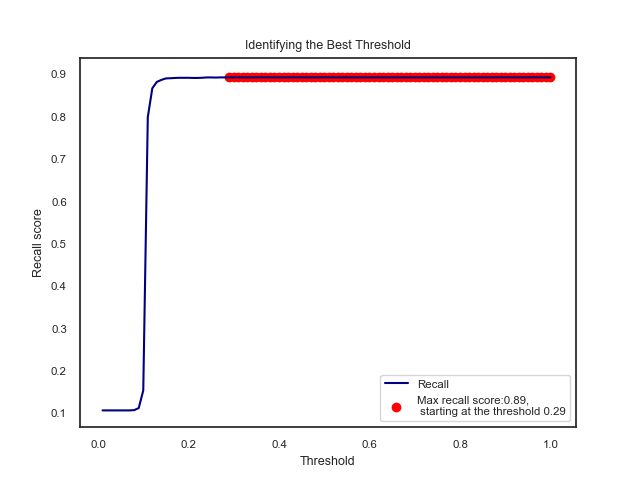

In [1046]:
import seaborn
seaborn.set_style(style='white')
plt.figure()
plt.grid(False)

plt.plot(dff.index,dff.Recall,label="Recall",color="navy")
maX=[]
for i in y:
    maX.append(dff.Recall.max())
plt.scatter(y,maX,color="red",label="Max recall score:{},\n starting at the threshold {}".format(round(maX[0],2),round(y[0],2)))
plt.xlabel("Threshold");plt.ylabel('Recall score')
plt.title('Identifying the Best Threshold')
plt.legend()
plt.show()